### Configurable Variables
Variables that can be modified in this notebook
- `input_data` — path to the input folder containing the dataset
- `supress_warnings` — boolean flag to enable/disable warning messages (`True`/`False`)
---
**Set following variables if you are running notebook interactively.**

In [16]:
input_path_folder_default = "somde_results/SN124_A595688_Rep2/somde_result.csv"
suppress_warnings_default = False

### Load variables from CMD

In [17]:
SUPPRESS_WARNINGS = None
try:
    if suppress_warnings == "True":
        SUPPRESS_WARNINGS = True
    else:
        SUPPRESS_WARNINGS = False
except NameError:
    SUPPRESS_WARNINGS = suppress_warnings_default

## Suppress Warnings (Optional)

* Suppress warnings for cleaner output.
* Comment out the line below if warnings are desired for debugging.

In [18]:
# Suppress warnings for cleaner output
import warnings
import os

if SUPPRESS_WARNINGS:
    print("Ignoring warnings.")
    warnings.filterwarnings('ignore')

### Environment setup

1. Install the necessary packages using `pip` if they are not already installed:

In [19]:
!pip install matplotlib pandas numpy ipywidgets --quiet
%matplotlib inline


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


2. Import necessary libraries:

In [20]:
# Import of libraries for working with spatial transcriptomics data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as w
from IPython.display import display
import os
import sys

3. load the dataset
  * **Option 1**: Import data directly from Google Drive (requires Google Colab).
  * **Option 2**: Load dataset path from CMD.

In [21]:
# OPTION 1
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
# OPTION 2
DATA_PATH = None
try:
    DATA_PATH = input_data_folder
except NameError:
    DATA_PATH = input_path_folder_default

if DATA_PATH is None or not os.path.exists(DATA_PATH):
    print("ERROR: Datapath (", DATA_PATH ,") not found.")
    sys.exit()

print("Using input path:", DATA_PATH)

DATA_FOLDER_NAME = DATA_PATH.split("/")[-2].strip()
output_dir = os.path.join("figures/show/somde/" + DATA_FOLDER_NAME)
os.makedirs(output_dir, exist_ok=True)

Using input path: somde_results/SN124_A595688_Rep2/somde_result.csv


# SOMDE vizualizations

In [23]:
result = pd.read_csv(DATA_PATH)
result

,Unnamed: 0,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval
0,17680,0.915971,4,PIGR,134.172792,0.069761,-291.271699,3.371556,3.707939,SE,338,1.079503e-04,0.015492,0.002742,605.835581,-582.194710,290.923011,0.0,0.0
1,17413,0.922244,4,ITLN1,134.172792,0.064114,-320.386104,1.892866,4.549529,SE,338,9.642247e-05,0.015774,0.002567,664.064392,-603.616841,283.230737,0.0,0.0
2,25979,0.892441,4,MUC2,134.172792,0.091650,-379.230203,4.087625,4.885727,SE,338,1.338906e-04,0.012830,0.002999,781.752589,-656.226864,276.996662,0.0,0.0
3,16121,0.999950,4,SEMG1,67.894177,0.000045,765.391220,-0.335712,0.721385,SE,338,3.209374e-07,92.623510,0.001851,-1507.490257,492.869185,272.522035,0.0,0.0
4,13158,0.999599,4,RETN,34.355843,0.000390,764.147508,-0.516764,0.045410,SE,338,3.265682e-09,0.014731,0.002087,-1505.002832,501.708254,262.439253,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36596,24546,0.892843,4,AC022973.3,134.172792,0.091267,11995.629004,-0.456778,0.003931,SE,338,1.035717e-04,0.009984,0.004340,-23967.965824,12395.347296,-399.718293,1.0,1.0
36597,24547,0.892843,4,AC131568.1,134.172792,0.091267,11995.629004,-0.456778,0.003931,SE,338,1.035717e-04,0.009984,0.004121,-23967.965824,12395.347296,-399.718293,1.0,1.0
36598,24548,0.892843,4,ASAP1-IT2,134.172792,0.091267,11995.629004,-0.456778,0.003931,SE,338,1.035717e-04,0.009984,0.004869,-23967.965824,12395.347296,-399.718293,1.0,1.0
36599,24549,0.892843,4,AC009682.1,134.172792,0.091267,11995.629004,-0.456778,0.003931,SE,338,1.035717e-04,0.009984,0.004612,-23967.965824,12395.347296,-399.718293,1.0,1.0


### Volkano plot
Plot shows the relation between significance and effect size. Efect size is the fraction of variance explained by spatial variation.

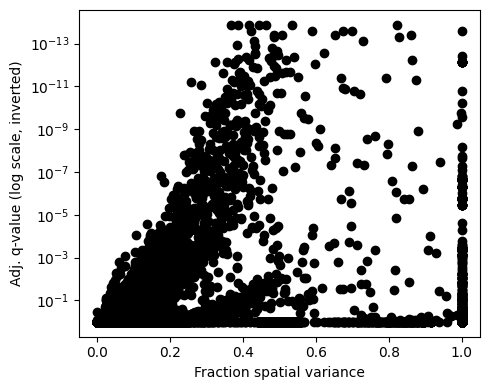

In [24]:
# Filter out non-positive q-values
plot_data = result[result['qval'] > 0]

plt.figure(figsize=(5, 4))
plt.scatter(plot_data['FSV'], plot_data['qval'], c='black')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. q-value (log scale, inverted)')
plt.tight_layout()
plt.show()


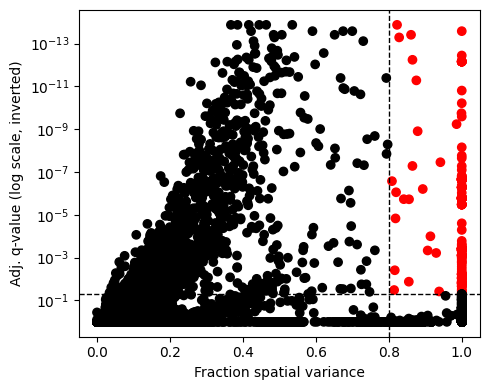

In [25]:
import matplotlib.pyplot as plt

# Filter out non-positive q-values
plot_data = result[result['qval'] > 0]

# Define colors based on the condition
colors = ['red' if (row['FSV'] >= 0.8 and row['qval'] <= 0.05) else 'black'
          for _, row in plot_data.iterrows()]

plt.figure(figsize=(5, 4))
plt.scatter(plot_data['FSV'], plot_data['qval'], c=colors)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.axhline(0.05, c='black', lw=1, ls='--')
plt.axvline(0.8, c='black', lw=1, ls='--')
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. q-value (log scale, inverted)')
plt.tight_layout()
plt.show()
